In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
#Read Data Files and Preview Data

urlAge = 'https://github.com/jacobgilbreath1997/GilbreathPortfolio/blob/main/Project_1/Child_Victims_by_Age.csv?raw=true'
urlTrend='https://github.com/jacobgilbreath1997/GilbreathPortfolio/blob/main/Project_1/Child_Victims_Trend.csv?raw=true'
Age = pd.read_csv(urlAge,sep=",",header=0)
Trend=pd.read_csv(urlTrend,sep=",",header=0)

Age.head(5)

,State,<1,1,2,3,4,5,6,7,8,...,8 Rate per 1000 Children,9 Rate per 1000 Children,10 Rate per 1000 Children,11 Rate per 1000 Children,12 Rate per 1000 Children,13 Rate per 1000 Children,14 Rate per 1000 Children,15 Rate per 1000 Children,16 Rate per 1000 Children,17 Rate per 1000 Children
0,Alabama,1945,761,714,731,668,621,578,567,544,...,9.1,9.2,9.0,7.9,7.8,9.1,10.2,9.2,6.5,4.2
1,Alaska,416,221,232,193,205,194,175,166,168,...,16.1,15.4,16.1,15.7,13.2,13.6,11.0,9.3,9.8,6.2
2,Arizona,3380,830,836,738,655,650,564,570,572,...,6.3,5.9,5.3,4.8,5.3,5.0,4.6,4.5,4.1,3.2
3,Arkansas,1814,524,528,487,459,425,381,397,356,...,9.2,8.2,9.7,8.3,8.0,8.7,9.4,9.1,7.6,5.8
4,California,10134,4221,3931,3796,3601,3653,3356,3449,3155,...,6.3,6.5,6.3,6.1,5.9,5.6,5.3,5.2,4.7,3.7


In [5]:
#Reformat Age Data For Graphs
# Create df with columns: State, Childe_Age(between <1 and 17, + misc), and Victims

Age2=Age.drop([52,53])

a=["<1","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","Misc"]
Victims=np.array(Age2["<1"])

#Child Age and Victims Columns
Child_Age=np.array(["<1"]*52)
for i in a[1:19]:
    Victims=np.append(Victims,np.array(Age2[i]))
    Child_Age=np.append(Child_Age,np.array([i]*52))

#Rate Column
k=["<1 Rate per 1000 Children","1 Rate per 1000 Children","2 Rate per 1000 Children","3 Rate per 1000 Children","4 Rate per 1000 Children","5 Rate per 1000 Children",
  "6 Rate per 1000 Children","7 Rate per 1000 Children","8 Rate per 1000 Children","9 Rate per 1000 Children","10 Rate per 1000 Children",
  "11 Rate per 1000 Children","12 Rate per 1000 Children","13 Rate per 1000 Children","14 Rate per 1000 Children","15 Rate per 1000 Children",
  "16 Rate per 1000 Children","17 Rate per 1000 Children"]
k2=np.array([0]*52)
Rate_1000=np.array(Age2["<1 Rate per 1000 Children"])
for i in k[1:18]:
    Rate_1000=np.append(Rate_1000,np.array(Age2[i]))
Rate_1000=np.append(Rate_1000,k2)

#State Columns
count=range(18)
State=np.array(Age2["State"])
for i in count:
    State=np.append(State,np.array(Age2["State"]))
    
d = {'State':State,'Child_Age': Child_Age, 'Victims': Victims,'Rate_1000':Rate_1000}
df = pd.DataFrame(data=d)

In [6]:
# DataFrame Preview

df.head(5)

,State,Child_Age,Victims,Rate_1000
0,Alabama,<1,1945.0,34.2
1,Alaska,<1,416.0,41.7
2,Arizona,<1,3380.0,41.3
3,Arkansas,<1,1814.0,49.9
4,California,<1,10134.0,21.9


In [7]:
Age2.head(5)

,State,<1,1,2,3,4,5,6,7,8,...,8 Rate per 1000 Children,9 Rate per 1000 Children,10 Rate per 1000 Children,11 Rate per 1000 Children,12 Rate per 1000 Children,13 Rate per 1000 Children,14 Rate per 1000 Children,15 Rate per 1000 Children,16 Rate per 1000 Children,17 Rate per 1000 Children
0,Alabama,1945,761,714,731,668,621,578,567,544,...,9.1,9.2,9.0,7.9,7.8,9.1,10.2,9.2,6.5,4.2
1,Alaska,416,221,232,193,205,194,175,166,168,...,16.1,15.4,16.1,15.7,13.2,13.6,11.0,9.3,9.8,6.2
2,Arizona,3380,830,836,738,655,650,564,570,572,...,6.3,5.9,5.3,4.8,5.3,5.0,4.6,4.5,4.1,3.2
3,Arkansas,1814,524,528,487,459,425,381,397,356,...,9.2,8.2,9.7,8.3,8.0,8.7,9.4,9.1,7.6,5.8
4,California,10134,4221,3931,3796,3601,3653,3356,3449,3155,...,6.3,6.5,6.3,6.1,5.9,5.6,5.3,5.2,4.7,3.7


[Text(0.5, 0, 'Child Age'),
 Text(0, 0.5, 'Victims'),
 Text(0.5, 1.0, 'Victims per Age')]

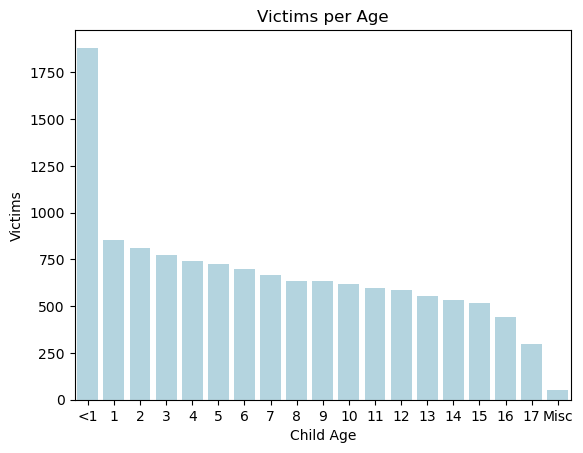

In [8]:
# VICTIMS PER AGE BAR GRAPH

g=sns.barplot(data=df, x="Child_Age",y="Victims",ci=None,color="lightblue")
g.set(xlabel='Child Age',ylabel='Victims', title ='Victims per Age')

[Text(0.5, 0, 'Child Age'),
 Text(0, 0.5, 'Rate per 1000'),
 Text(0.5, 1.0, 'Rate per Age')]

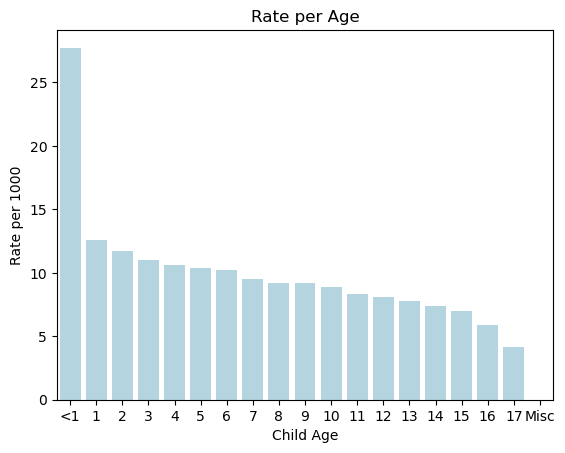

In [9]:
# RATE PER AGE BAR GRAPH

g=sns.barplot(data=df, x="Child_Age",y="Rate_1000",ci=None,color="lightblue")
g.set(xlabel='Child Age',ylabel='Rate per 1000', title ='Rate per Age')

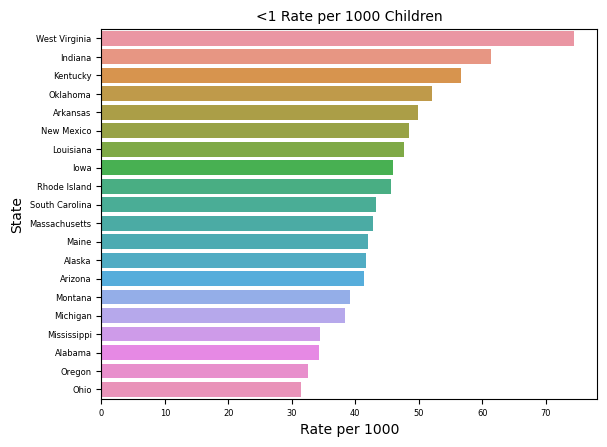

In [10]:
#  Top Rate per 1000 Children by AGE and STATE

top=20 #Change this value for more or less states graphed

k='<1 Rate per 1000 Children' #Change the first number to the age you want graphed
b=sns.barplot(data=Age2.sort_values(by=[k],ascending=False).head(top),x=k,y="State",capsize=0.4)
b.axes.set_title(k,fontsize=10)
b.set_xlabel("Rate per 1000",fontsize=10)
b.set_ylabel("State",fontsize=10)
b.tick_params(labelsize=6)
plt.show()

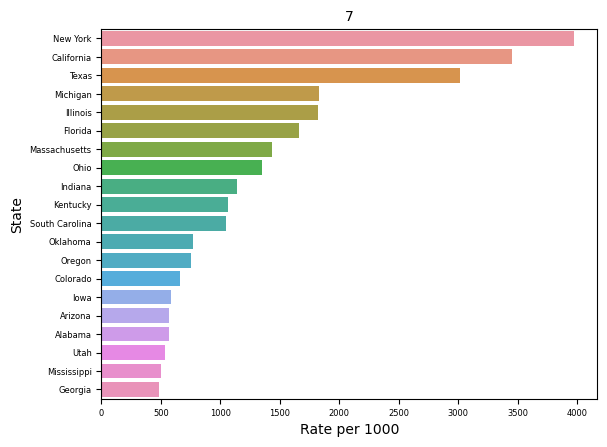

In [11]:
# Number of Victims by AGE and STATE

k='7'
b=sns.barplot(data=Age2.sort_values(by=[k],ascending=False).head(20),x=k,y="State",capsize=0.4)
b.axes.set_title(k,fontsize=10)
b.set_xlabel("Rate per 1000",fontsize=10)
b.set_ylabel("State",fontsize=10)
b.tick_params(labelsize=6)
plt.show()

In [12]:
X=np.array(Age2["10 Rate per 1000 Children"])
y = np.array(Age2["<1 Rate per 1000 Children"])
X=X.reshape(-1, 1)
y=y.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)


reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test,y_test)

0.4670326960642145

In [13]:
## GENERATE LINEAR REGRESSION MODEL FOR EACH AGE RATE TO ONE ANOTHER ##

# Creates matrix, M, which holds all the regression scores fopr each model #

L=Age2.columns[21:39]
scores=[]
M = [[0 for x in range(18)] for y in range(18)]
for i in range(18):
    for j in range(18):
        X=np.array(Age2[L[i]])
        y = np.array(Age2[L[j]])
        X=X.reshape(-1, 1)
        y=y.reshape(-1,1)


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)


        reg = LinearRegression().fit(X_train, y_train)
        s=reg.score(X_test,y_test)
        scores.append(s)
        M[i][j]=s
        print(L[i]," to ",L[j],": ",s)


<1 Rate per 1000 Children  to  <1 Rate per 1000 Children :  1.0
<1 Rate per 1000 Children  to  1 Rate per 1000 Children :  0.5964898284425559
<1 Rate per 1000 Children  to  2 Rate per 1000 Children :  0.6421012646920743
<1 Rate per 1000 Children  to  3 Rate per 1000 Children :  0.5153089338981044
<1 Rate per 1000 Children  to  4 Rate per 1000 Children :  0.5855358061882925
<1 Rate per 1000 Children  to  5 Rate per 1000 Children :  0.5672937963937948
<1 Rate per 1000 Children  to  6 Rate per 1000 Children :  0.5530152317224133
<1 Rate per 1000 Children  to  7 Rate per 1000 Children :  0.5725048140590587
<1 Rate per 1000 Children  to  8 Rate per 1000 Children :  0.5954246177968519
<1 Rate per 1000 Children  to  9 Rate per 1000 Children :  0.5009238565400873
<1 Rate per 1000 Children  to  10 Rate per 1000 Children :  0.4483601616710684
<1 Rate per 1000 Children  to  11 Rate per 1000 Children :  0.45516942149515827
<1 Rate per 1000 Children  to  12 Rate per 1000 Children :  0.4266715093844

16 Rate per 1000 Children  to  11 Rate per 1000 Children :  0.8662465916444726
16 Rate per 1000 Children  to  12 Rate per 1000 Children :  0.8692371469244397
16 Rate per 1000 Children  to  13 Rate per 1000 Children :  0.9031295853174028
16 Rate per 1000 Children  to  14 Rate per 1000 Children :  0.9531262845829738
16 Rate per 1000 Children  to  15 Rate per 1000 Children :  0.9823347928254097
16 Rate per 1000 Children  to  16 Rate per 1000 Children :  1.0
16 Rate per 1000 Children  to  17 Rate per 1000 Children :  0.8638964122938999
17 Rate per 1000 Children  to  <1 Rate per 1000 Children :  0.2977465917334575
17 Rate per 1000 Children  to  1 Rate per 1000 Children :  0.603464220198904
17 Rate per 1000 Children  to  2 Rate per 1000 Children :  0.6166874266653098
17 Rate per 1000 Children  to  3 Rate per 1000 Children :  0.7026503305123409
17 Rate per 1000 Children  to  4 Rate per 1000 Children :  0.6374415426042361
17 Rate per 1000 Children  to  5 Rate per 1000 Children :  0.69518671025

In [14]:
## MEDIAN SCORE FOR EACH AGE GROUP ##
mx=[]
for i in range(18):
    mx.append(np.median(M[i]))
    print(L[i],": ",np.median(M[i]))

<1 Rate per 1000 Children :  0.5081163952190959
1 Rate per 1000 Children :  0.8666201649535448
2 Rate per 1000 Children :  0.8701102928087425
3 Rate per 1000 Children :  0.8959828252149791
4 Rate per 1000 Children :  0.9106570494895543
5 Rate per 1000 Children :  0.9336646463928056
6 Rate per 1000 Children :  0.9370678382392247
7 Rate per 1000 Children :  0.9168876839480461
8 Rate per 1000 Children :  0.9287419224743341
9 Rate per 1000 Children :  0.9423877073452569
10 Rate per 1000 Children :  0.9194415595039405
11 Rate per 1000 Children :  0.9125894794762575
12 Rate per 1000 Children :  0.9253472200588211
13 Rate per 1000 Children :  0.9347874737480144
14 Rate per 1000 Children :  0.8783678596325586
15 Rate per 1000 Children :  0.8265109110575541
16 Rate per 1000 Children :  0.8239921482152823
17 Rate per 1000 Children :  0.7032083608633384


According to the test scores seen above, the highest correlation lies with 9 year olds, where the least amount of correlation is with those less than 1 year old. This may be due to the fact that 9 year olds are in the middle of the range of ages we are considering and the overall correlation is more closeley associated with those closer in age.

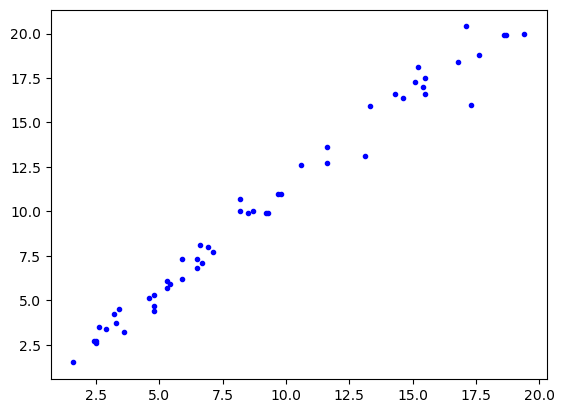

In [20]:
plt.plot(Age2["9 Rate per 1000 Children"],Age2["6 Rate per 1000 Children"],'b.')

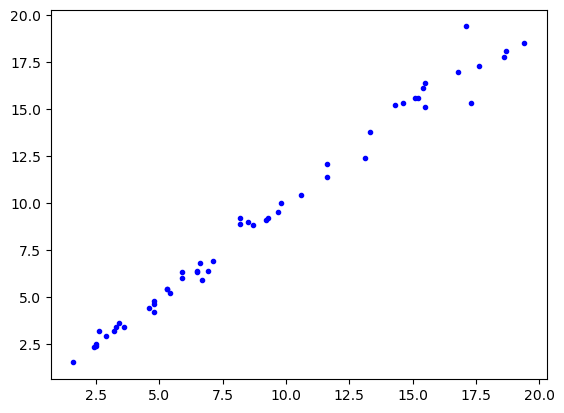

In [18]:
plt.plot(Age2["9 Rate per 1000 Children"],Age2["8 Rate per 1000 Children"],'b.')